# Assignment 2 - Data Analysis Recipes : Fitting a model to data

$Kedar Mal (2022PHZ8451)$

$Mohit Kumar(2022PHZ8449)$



### Exercise 1: Linear least squares with partial data

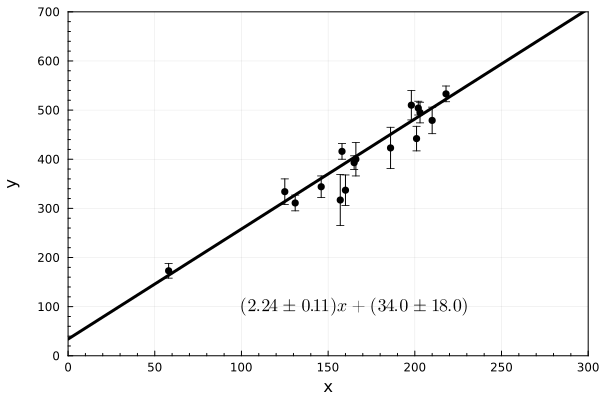

In [1]:
using CSV,DataFrames,Plots,LinearAlgebra,LaTeXStrings,SparseArrays

df = CSV.read("data.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)
df1 = df[df.ID .> 4, :]
x = Array(df1.x)
y = Array(df1.y)
σx = Array(df1.sig_x)
σy = Array(df1.sig_y)
rho_xy = Array(df1.rho_xy)
n = length(x)

# Define Matrix
X = zeros(n)
Y = zeros(n) # defining a vector of n rows
A = ones(n,2) # defining matrix of n rows and 2 columns
C = zeros(n,n) # defining matrix of n rows and n columns
for i in 1:n
    Y[i] = y[i]
    X[i] = x[i]
    A[i,2] = X[i]
    C[i,i] = σy[i]^2
end

bestfit = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y) #best fit
b1 = round(bestfit[1],digits = 0)
m1 = round(bestfit[2],digits = 2)
#The full uncertainty covariance matrix for each data point is given by
S = inv(transpose(A)*inv(C)*A)
# Standard Error in Intercept
SE_b = round(sqrt(S[1,1]),digits=0)
# Standard Error in Slope
SE_m = round(sqrt(S[2,2]),digits=2)
plot(framestyle=:box,xlims=(0,300),ylims=(0,700),xticks=10,xminorticks=5,yticks=12,yminorticks=5,xlabel="x",ylabel="y")
plot_lines = plot!(x -> m1*x + b1, 0, 300, color = :black, alpha = 1,lw=3,legend=false)
scatter!(X,Y,yerr = σy,label="σy",mc=:black)
note=raw"(\textrm{"*"$m1"*raw"} \pm \textrm{"*"$SE_m"*raw"})x + (\textrm{"*"$b1"*raw"} \pm \textrm{"*"$SE_b"*raw"})"
annotate!( 100,  100, text(latexstring(note),:left, 12))

### Exercise 2 : Linear least squares with full data

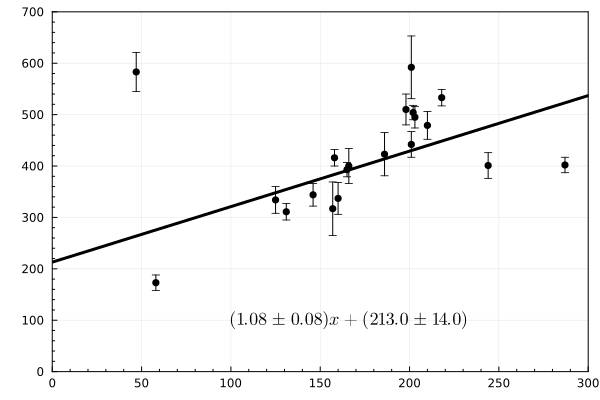

In [2]:
using CSV,DataFrames,Plots,LinearAlgebra,LaTeXStrings,SparseArrays

df = CSV.read("data.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)
x = Array(df.x)
y = Array(df.y)
σx = Array(df.sig_x)
σy = Array(df.sig_y)
rho_xy = Array(df.rho_xy)
n = length(x)

# Define Matrix
X = zeros(n)
Y = zeros(n) # defining a vector of n rows
A = ones(n,2) # defining matrix of n rows and 2 columns
C = zeros(n,n) # defining matrix of n rows and n columns
for i in 1:n
    Y[i] = y[i]
    X[i] = x[i]
    A[i,2] = X[i]
    C[i,i] = σy[i]^2
end

bestfit = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y) #best fit
b1 = round(bestfit[1],digits = 0)
m1 = round(bestfit[2],digits = 2)
#The full uncertainty covariance matrix for each data point is given by
S = inv(transpose(A)*inv(C)*A)
# Standard Error in Intercept
SE_b = round(sqrt(S[1,1]),digits=0)
# Standard Error in Slope
SE_m = round(sqrt(S[2,2]),digits=2)
plot(framestyle=:box,xlims=(0,300),ylims=(0,700),xticks=10,xminorticks=5,yticks=12,yminorticks=5)
plot_lines = plot!(x -> m1*x + b1, 0, 300, color = :black, alpha = 1,lw=3,legend=false)
scatter!(X,Y,yerr = σy,label="σy",mc=:black)
note=raw"(\textrm{"*"$m1"*raw"} \pm \textrm{"*"$SE_m"*raw"})x + (\textrm{"*"$b1"*raw"} \pm \textrm{"*"$SE_b"*raw"})"
annotate!( 100,  100, text(latexstring(note),:left, 12))

## Exercise 3: Quadratic solution with partial data

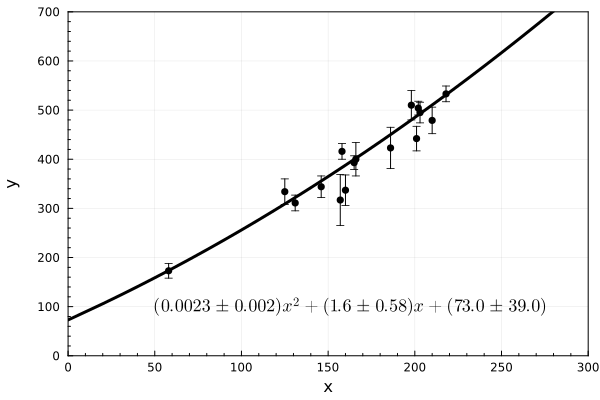

In [3]:
using CSV,DataFrames,Plots,LinearAlgebra,LaTeXStrings,SparseArrays

df = CSV.read("data.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)
df1 = df[df.ID .> 4, :]
x = Array(df1.x)
y = Array(df1.y)
σx = Array(df1.sig_x)
σy = Array(df1.sig_y)
rho_xy = Array(df1.rho_xy)
n = length(x)

# Define Matrix
X = zeros(n)
Y = zeros(n) # defining a vector of n rows
A = ones(n,3) # defining matrix of n rows and 2 columns
C = zeros(n,n) # defining matrix of n rows and n columns
for i in 1:n
    Y[i] = y[i]
    X[i] = x[i]
    A[i,2] = X[i]
    A[i,3] = X[i]^2
    C[i,i] = σy[i]^2
end

bestfit = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y) #best fit
b = round(bestfit[1,1],digits = 0)
m = round(bestfit[2,1],digits = 2)
q = round(bestfit[3,1],digits =4 )
#The full uncertainty covariance matrix for each data point is given by
S = inv(transpose(A)*inv(C)*A)
SE_b = round(sqrt(S[1,1]),digits=0)
SE_m = round(sqrt(S[2,2]),digits=2)
SE_q = round(sqrt(S[3,3]),digits=3)

plot(framestyle=:box,xlims=(0,300),ylims=(0,700),xticks=10,xminorticks=5,yticks=12,yminorticks=5,xlabel="x",ylabel="y")
plot_lines = plot!(x -> q*x^2+m*x + b, 0, 300, color = :black, alpha = 1,lw=3,legend=false)
scatter!(X,Y,yerr = σy,label="σy",mc=:black)
note=raw"(\textrm{"*"$q"*raw"} \pm \textrm{"*"$SE_q"*raw"})x^2 + (\textrm{"*"$m"*raw"} \pm \textrm{"*"$SE_m"*raw"})x + (\textrm{"*"$b"*raw"} \pm \textrm{"*"$SE_b"*raw"})"
annotate!( 50,  100, text(latexstring(note),:left, 12))


## Exercise 4: Maximum likelihood for single value with normal measurement noise

The frequency distribution for $t_{i}$ is: 

$ p(tᵢ|σₜᵢ,T)$ = $\frac{1}{\sqrt{2\pi{\sigma_{ti}}^{2}}}$ exp$\left(\frac{-{(t_{i}-T)}^{2}}{2{\sigma_{ti}}^{2}}\right)$
    
The frequency distribution can be use to calculate the likelihood 
                         
$ L = \prod_{i=1}^{N} p(t_{i} | \sigma_{ti}, T)$    

and log likelihood 

ln$L = K - \sum_{i = 1}^{N}$ $ \left(\frac{{(t_{i}-T)}^{2}}{2{\sigma_{ti}}^{2}} \right)$,   where $K$ is some constant

The maximum log likelihood is obtained when the derivative to $T$ is zero: 

$0 = \frac{d}{dT}$ln$L = \sum_{i=1}^{N}\frac{{(t_{i}-T)}}{{\sigma_{ti}}^{2}}$

Indeed this is a maximum: 

$\frac{d}{dT}$ln$L = -\sum_{i=1}^{N}\frac{1}{{\sigma_{ti}}^{2}}<0$

The maximum log likelihood is obtained when: 
$ T = \frac{\sum_{i=1}^{N}\frac{t_{i}}{{\sigma_{ti}}^{2}}}{\sum_{i=1}^{N}\frac{1}{{\sigma_{ti}}^{2}}}$

## Exercise 5: Derivation of analytical expression

Starting from the defination of $\chi^{2}$ as given in an equation (7)

$\chi^{2} = {\left[Y-AX\right]}^{T}{C}^{-1}\left[Y-AX\right]$

Take a derivative with respect to $X$ as                          
        
$0 = \frac{d}{dX}{\chi}^{2} = -{A}^{T}{C}^{-1}\left[Y-AX\right]-{\left[Y-AX\right]}^{T}{C}^{-1}A$

or  

${A}^{T}{C}^{-1}AX= {A}^{T}{C}^{-1}Y$  where $Y = AX$ used from equation (6)

further solving above equation for $X$

$X = {\left[{A}^{T}{C}^{-1}A\right]}^{-1}\left[{A}^{T}{C}^{-1}Y\right]$

which is equation (5)

## Exercises 6: Mixture model using Metropolis-Hastings MCMC

Acceptance ratio was = 0.4521095238095238

Best-fit, overall!
[31.24452616946264, 2.2606241016306305, 0.2648929691362247, 441.05740764070805, 8.579435019497645] 0.28768889229403555 0.27397052429069696
Best-fit, marginalized
33.0 2.23
34.0 2.235
35.0 2.24
bestm = 2.235 bestb = 34.0


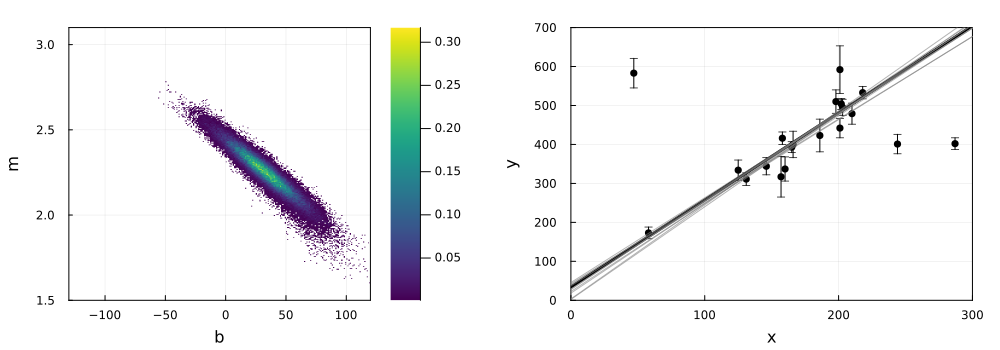

In [4]:
using CSV,DataFrames,Plots,Random,Distributions,LinearAlgebra,LaTeXStrings,SparseArrays,Statistics,Measures,StatsBase

df = CSV.read("data.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)
x = Array(df.x)
y = Array(df.y)
σx = Array(df.sig_x)
σy = Array(df.sig_y)
rho_xy = Array(df.rho_xy)
n = length(x)

# Define Matrix
X = zeros(n)
Y = zeros(n) # defining a vector of n rows
A = ones(n,2) # defining matrix of n rows and 2 columns
C = zeros(n,n) # defining matrix of n rows and n columns
yerr = zeros(n)
for i in 1:n
    Y[i] = y[i]
    X[i] = x[i]
    A[i,2] = X[i]
    C[i,i] = σy[i]^2
    yerr[i] = σy[i]
end

#Now compute the best fit and the uncertainties
bestfit = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y) #best fit

"""The objective function"""
function objective(pars,X,Y,yerr)
    b = pars[1]
    m = pars[2]
    Pb = pars[3]
    Yb = pars[4]
    Vb = exp(pars[5])
    if (Pb < 0 || Pb > 1)
        return -prevfloat(typemax(Float64))
    end
    return sum(log((1-Pb)/sqrt(2*pi*yerr[i]^2)*exp(-0.5*(Y[i]-m*X[i]-b)^2/yerr[i]^2)+Pb/sqrt(2*pi*(Vb+yerr[i]^2))*exp(-0.5*(Y[i]-Yb)^2/(Vb+yerr[i]^2))) for i in 1:length(X))#+pars[4]
end

#With this initial guess start off the sampling procedure
"""The metropolis_hastings MCMC function"""
function metropolis_hastings(initial_guess,X,Y,yerr,objective,nsample,nburn)
#With this initial guess start off the sampling procedure 
initialX = objective(initial_guess,X,Y,yerr)
currentX = initialX
bestX = initialX
bestfit = initial_guess
currentguess = initial_guess
naccept = 0
accepted_samples = []
push!(accepted_samples,currentguess)

parsigma=[5,0.075,0.01,1,0.1]   # proposal distribution
    for i in 1:(nburn+nsample)
        #Draw a sample from the proposal distribution
        newsample= zeros(5)
        newsample[1]= currentguess[1]+randn()*parsigma[1]
        newsample[2]= currentguess[2]+randn()*parsigma[2]
        #newsample[3]= rand()
        newsample[3]= currentguess[3]+randn()*parsigma[3]
        newsample[4]= currentguess[4]+randn()*parsigma[4]
        newsample[5]= currentguess[5]+randn()*parsigma[5]
        
        #Calculate the objective function for the newsample
        newX = objective(newsample,X,Y,yerr)
        u = rand()
        try
            #test = 0.0
            global test = exp(newX-currentX)
        catch error
            test = 2
        end
        if u < test
            #Accept
            currentX = newX
            currentguess = newsample
            naccept = naccept+1
        end
        if currentX > bestX
            bestfit = currentguess
            bestX = currentX
        end
        push!(accepted_samples,currentguess)
    end
    if ((naccept)/(nburn+nsample) < 0.5 || (naccept)/(nburn+nsample) > 0.8)
        println("Acceptance ratio was = ", (naccept)/(nburn+nsample))
        #println(naccept)
    end
    return bestfit, accepted_samples
end

#Now sample
initial_guess= ([bestfit[1],bestfit[2],0.0,mean(Y),log(var(Y))])#(m,b,Pb,Yb,Vb)
nsample = 2E5  #number of samples to take after burn-in
nburn = 10000
bestfit,accepted_samples = metropolis_hastings(initial_guess,X,Y,yerr,objective,nsample,nburn)
# accepted samples after burn in
samples=reduce(vcat,transpose.(accepted_samples))
samples=samples[setdiff(1:end, (1:nburn),(end)),:]
println()
println("Best-fit, overall!")
println(bestfit," ",mean(samples[:,3])," ",median(samples[:,3]))

#2D histogram
# Best-fit, marginalized
accepted_b = samples[:,1]
accepted_m = samples[:,2]
accepted_Pb = samples[:,3]
bins = Int(round(sqrt(nsample)/2))
histbm = fit(Histogram,(accepted_b,accepted_m),nbins=bins)

#Data with MAP line and sampling
# get the position of highest weights which is the most populated bin:
indexi=argmax(histbm.weights)[1]
indexj=argmax(histbm.weights)[2]
println("Best-fit, marginalized")
println(histbm.edges[1][indexi-1]," ",histbm.edges[2][indexj-1])
println(histbm.edges[1][indexi]," ",histbm.edges[2][indexj])
println(histbm.edges[1][indexi+1]," ",histbm.edges[2][indexj+1])
bestm = histbm.edges[2][indexj]
bestb = histbm.edges[1][indexi]
println("bestm = ",bestm," bestb = ",bestb)
histbm = histogram2d(accepted_b, accepted_m,nbins=bins, c=:viridis, xlabel="b", ylabel="m", xlims = (-130,120), ylims = (1.5,3.1),normalize=:pdf)

plot_lines = plot(xlims=(0,300),ylims=(0,700),legend=false)
plot_lines = plot!(x -> bestm*x + bestb, 0, 300,color = :black, alpha = 1,w=3,xlabel="x",ylabel="y",legend=false)
plot_lines = scatter!(X,Y,yerr=yerr,mc=:black)

#plot a sampling of 10 lines drawn from the marginalized posterior distribution for (m,b)
for i in 1:10
    ransample = Int(round(rand()*nsample))
    ransample = samples[ransample,1:2]
    mf = ransample[2]
    b  = ransample[1]
    plot_lines = plot!(x -> mf*x + b, 0, 300,color = :gray, alpha = 0.6,w=1,legend=false)
end
plot(histbm,plot_lines,size = (1000, 350),layout = (1,2), margin = 5mm,framestyle=:box)







## Exercise 7

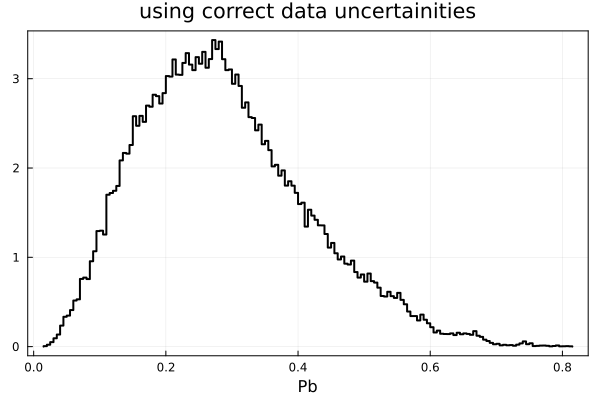

In [5]:
# Plot with marginalization over m, b, Vb, Yb for parameter Pb
histPb = stephist(accepted_Pb, nbins=200,lw=2,c=:black,legend=false,density = true,normalize=:pdf)
plot(histPb,xlabel="Pb", title = "using correct data uncertainities",framestyle=:box)


### All data uncertainty variances σy² divided by 4 or dividing the uncertainties by 2

Acceptance ratio was = 0.4475857142857143

Best-fit, overall!
[58.716438517109914, 1.9732425299105611, 0.570292020956926, 469.1424473694012, 8.623586824466607] 0.5700948309718809 0.5675235732390889
Best-fit, marginalized
54.0 1.9600000000000002
56.0 1.9800000000000002
58.0 2.0
bestm = 1.9800000000000002 bestb = 56.0


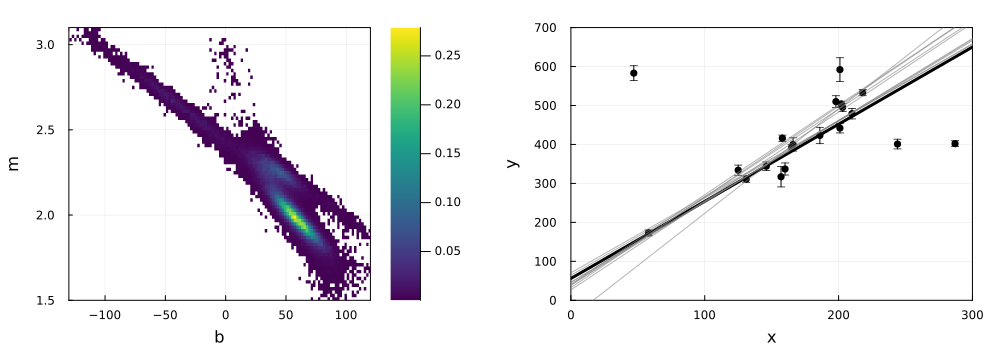

In [6]:
using CSV,DataFrames,Plots,Random,Distributions,LinearAlgebra,LaTeXStrings,SparseArrays,Statistics,Measures,StatsBase

df = CSV.read("data.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)
x = Array(df.x)
y = Array(df.y)
σx = Array(df.sig_x)
σy = Array(df.sig_y)
rho_xy = Array(df.rho_xy)
n = length(x)

# Define Matrix
X = zeros(n)
Y = zeros(n) # defining a vector of n rows
A = ones(n,2) # defining matrix of n rows and 2 columns
C = zeros(n,n) # defining matrix of n rows and n columns
yerr = zeros(n)
for i in 1:n
    Y[i] = y[i]
    X[i] = x[i]
    A[i,2] = X[i]
    C[i,i] = (σy[i]^2)/4
    yerr[i] = (σy[i])/2
end

#Now compute the best fit and the uncertainties
bestfit = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y) #best fit

"""The objective function"""
function objective(pars,X,Y,yerr)
    b = pars[1]
    m = pars[2]
    Pb = pars[3]
    Yb = pars[4]
    Vb = exp(pars[5])
    if (Pb < 0 || Pb > 1)
        return -prevfloat(typemax(Float64))
    end
    return sum(log((1-Pb)/sqrt(2*pi*yerr[i]^2)*exp(-0.5*(Y[i]-m*X[i]-b)^2/yerr[i]^2)+Pb/sqrt(2*pi*(Vb+yerr[i]^2))*exp(-0.5*(Y[i]-Yb)^2/(Vb+yerr[i]^2))) for i in 1:length(X))#+pars[4]
end

#With this initial guess start off the sampling procedure
"""The metropolis_hastings MCMC function"""
function metropolis_hastings(initial_guess,X,Y,yerr,objective,nsample,nburn)
#With this initial guess start off the sampling procedure 
initialX = objective(initial_guess,X,Y,yerr)
currentX = initialX
bestX = initialX
bestfit = initial_guess
currentguess = initial_guess
naccept = 0
accepted_samples = []
push!(accepted_samples,currentguess)

parsigma=[5,0.075,0.01,1,0.1]   # proposal distribution
    for i in 1:(nburn+nsample)
        #Draw a sample from the proposal distribution
        newsample= zeros(5)
        newsample[1]= currentguess[1]+randn()*parsigma[1]
        newsample[2]= currentguess[2]+randn()*parsigma[2]
        #newsample[3]= rand()
        newsample[3]= currentguess[3]+randn()*parsigma[3]
        newsample[4]= currentguess[4]+randn()*parsigma[4]
        newsample[5]= currentguess[5]+randn()*parsigma[5]
        
        #Calculate the objective function for the newsample
        newX = objective(newsample,X,Y,yerr)
        u = rand()
        try
            #test = 0.0
            global test = exp(newX-currentX)
        catch error
            test = 2
        end
        if u < test
            #Accept
            currentX = newX
            currentguess = newsample
            naccept = naccept+1
        end
        if currentX > bestX
            bestfit = currentguess
            bestX = currentX
        end
        push!(accepted_samples,currentguess)
    end
    if ((naccept)/(nburn+nsample) < 0.5 || (naccept)/(nburn+nsample) > 0.8)
        println("Acceptance ratio was = ", (naccept)/(nburn+nsample))
        #println(naccept)
    end
    return bestfit, accepted_samples
end

#Now sample
initial_guess= ([bestfit[1],bestfit[2],0.0,mean(Y),log(var(Y))])#(m,b,Pb,Yb,Vb)
nsample = 2E5  #number of samples to take after burn-in
nburn = 10000
bestfit,accepted_samples = metropolis_hastings(initial_guess,X,Y,yerr,objective,nsample,nburn)
# accepted samples after burn in
samples=reduce(vcat,transpose.(accepted_samples))
samples=samples[setdiff(1:end, (1:nburn),(end)),:]
println()
println("Best-fit, overall!")
println(bestfit," ",mean(samples[:,3])," ",median(samples[:,3]))

#2D histogram
# Best-fit, marginalized
accepted_b = samples[:,1]
accepted_m = samples[:,2]
accepted_Pb = samples[:,3]
bins = Int(round(sqrt(nsample)/2))
histbm = fit(Histogram,(accepted_b,accepted_m),nbins=bins)
#Data with MAP line and sampling
# get the position of highest weights which is the most populated bin:
indexi=argmax(histbm.weights)[1]
indexj=argmax(histbm.weights)[2]
println("Best-fit, marginalized")
println(histbm.edges[1][indexi-1]," ",histbm.edges[2][indexj-1])
println(histbm.edges[1][indexi]," ",histbm.edges[2][indexj])
println(histbm.edges[1][indexi+1]," ",histbm.edges[2][indexj+1])
bestm = histbm.edges[2][indexj]
bestb = histbm.edges[1][indexi]
println("bestm = ",bestm," bestb = ",bestb)
histbm = histogram2d(accepted_b, accepted_m,nbins=bins, c=:viridis, xlabel="b", ylabel="m", xlims = (-130,120), ylims = (1.5,3.1),normalize=:pdf)

plot_lines = plot(xlims=(0,300),ylims=(0,700),legend=false)
plot_lines = plot!(x -> bestm*x + bestb, 0, 300,color = :black, alpha = 1,w=3,xlabel="x",ylabel="y",legend=false)
plot_lines = scatter!(X,Y,yerr=yerr,mc=:black)
#plot a sampling of 10 lines drawn from the marginalized posterior distribution for (m,b)
for i in 1:10
    ransample = Int(round(rand()*nsample))
    ransample = samples[ransample,1:2]
    mf = ransample[2]
    b  = ransample[1]
    plot_lines = plot!(x -> mf*x + b, 0, 300,color = :gray, alpha = 0.6,w=1,legend=false)
end
plot(histbm,plot_lines,size = (1000, 350),layout = (1,2), margin = 5mm,framestyle=:box)



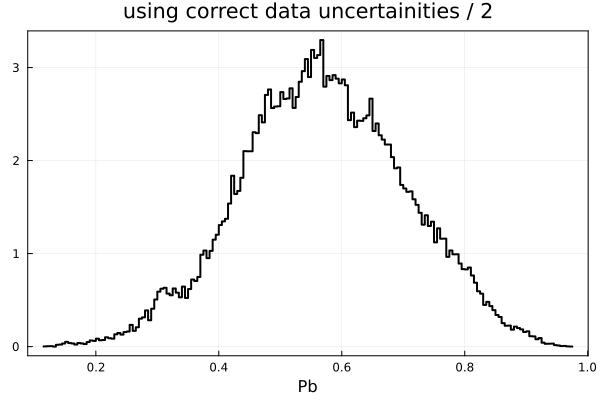

In [7]:
# Plot with marginalization over m, b, Vb, Yb for parameter Pb using data uncertaintities / 2
histPb = stephist(accepted_Pb, nbins=bins,lw=2,c=:black,legend=false,density = true,normalize=:pdf)
plot(histPb,xlabel="Pb", title = "using correct data uncertainities / 2",framestyle=:box)

## Exercise 8 : Comparison of standard uncertainty σₘ² with calculated by bootstrap and jackknife methods

In [8]:
using Pandas, CSV, DataFrames, Plots, Statistics, LinearAlgebra

function least_square_fit(df)
    x = Array(df.x)
    y = Array(df.y)
    σx = Array(df.sig_x)
    σy = Array(df.sig_y)
    rho_xy = Array(df.rho_xy)
    n = length(x)
    
    # Define Matrix
    X = zeros(n)
    Y = zeros(n) # defining a vector of n rows
    A = ones(n,2) # defining matrix of n rows and 2 columns
    C = zeros(n,n) # defining matrix of n rows and n columns
    yerr = zeros(n)
    for i in 1:n
        Y[i] = y[i]
        X[i] = x[i]
        A[i,2] = X[i]
        C[i,i] = σy[i]^2
        yerr[i] = σy[i]
    end    
    # least square fit    
    bestfit = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y)
    S = inv(transpose(A)*inv(C)*A)    
    m = bestfit[2] # slope
    b = bestfit[1] # intercept
    SE_m = sqrt(inv(A' * inv(C) * A)[2, 2]) # Standard Error of Slope
    SE_b = sqrt(inv(A' * inv(C) * A)[1, 1]) # Standard error of intercept
    return m, SE_m, b, SE_b
end

df = read_csv("data.csv")

M = 20000
N = length(df.x)

## bootstrap estimate of uncertainty

m_orginal = least_square_fit(df)[1]

m_values = []

for i in 1:M
    replaced_sample = Pandas.sample(df, N, replace=true)
    m_current = least_square_fit(replaced_sample)[1]
    push!(m_values, m_current)
end

sigma_m_bootstrap = sum((m_values.-m_orginal).^2) / (M)
println("Original slope uncertainty: ", least_square_fit(df)[2])
println("Estimated uncertainty of slope by Bootstrap: ", sigma_m_bootstrap)

# jackknife estimate of uncertainty
m_values = []

for i in 1:N
    sample_without_ith_row = Pandas.sample(df, N, replace=true, ignore_index=i)
    m_current = least_square_fit(sample_without_ith_row)[1]
    push!(m_values, m_current)
end

sigma_m_jackknife = (N - 1) * sum((m_values.- m_orginal).^2) / N
println("Estimated uncertainty of slope by Jackknife: ", sigma_m_jackknife)


Original slope uncertainty: 0.0774067831657561
Estimated uncertainty of slope by Bootstrap: 0.3761325518797018


Estimated uncertainty of slope by Jackknife: 5.659893416865446


## Excercise 9: Mixture model using Metropolis-Hastings MCMC for inliers

### (a) with all inlier points from 5 to 20 and using correct uncertainties

Acceptance ratio was = 0.3706761904761905

Best-fit, overall!
[34.047727757542816, 2.239920831631096, 0.0, 400.6875, 9.114280452854228] 0.0598420541670213 0.04133326889344473
Best-fit, marginalized
32.0 2.245
33.0 2.25
34.0 2.255
bestm = 2.25 bestb = 33.0


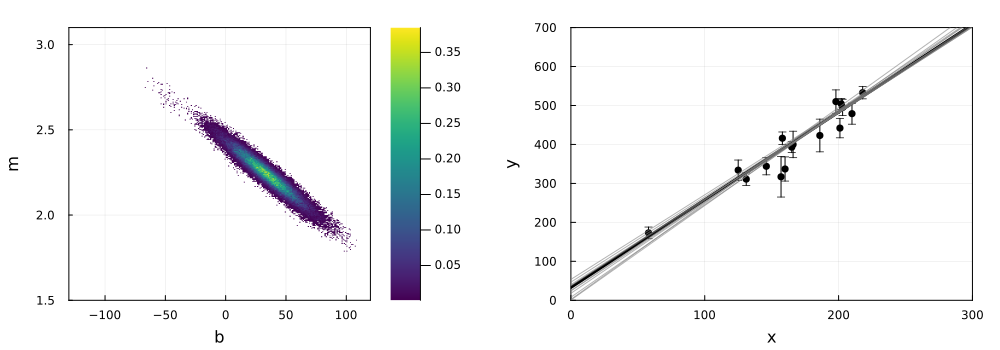

In [9]:
using CSV,DataFrames,Plots,Random,Distributions,LinearAlgebra,LaTeXStrings,SparseArrays,Statistics,Measures,StatsBase

df = CSV.read("data.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)
df1 = df[df.ID .> 4, :]

x = Array(df1.x)
y = Array(df1.y)
σx = Array(df1.sig_x)
σy = Array(df1.sig_y)
rho_xy = Array(df1.rho_xy)
n = length(x)

# Define Matrix
X = zeros(n)
Y = zeros(n) # defining a vector of n rows
A = ones(n,2) # defining matrix of n rows and 2 columns
C = zeros(n,n) # defining matrix of n rows and n columns
yerr = zeros(n)
for i in 1:n
    Y[i] = y[i]
    X[i] = x[i]
    A[i,2] = X[i]
    C[i,i] = σy[i]^2
    yerr[i] = σy[i]
end

#Now compute the best fit and the uncertainties
bestfit = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y) #best fit

"""The objective function"""
function objective(pars,X,Y,yerr)
    b = pars[1]
    m = pars[2]
    Pb = pars[3]
    Yb = pars[4]
    Vb = exp(pars[5])
    if (Pb < 0 || Pb > 1)
        return -prevfloat(typemax(Float64))
    end#With this initial guess start off the sampling procedure
"""The metropolis_hastings MCMC function"""
function metropolis_hastings(initial_guess,X,Y,yerr,objective,nsample,nburn)
#With this initial guess start off the sampling procedure 
initialX = objective(initial_guess,X,Y,yerr)
currentX = initialX
bestX = initialX
bestfit = initial_guess
currentguess = initial_guess
naccept = 0
accepted_samples = []
push!(accepted_samples,currentguess)

parsigma=[5,0.075,0.01,1,0.1]   # proposal distribution
    for i in 1:(nburn+nsample)
        #Draw a sample from the proposal distribution
        newsample= zeros(5)
        newsample[1]= currentguess[1]+randn()*parsigma[1]
        newsample[2]= currentguess[2]+randn()*parsigma[2]
        #newsample[3]= rand()
        newsample[3]= currentguess[3]+randn()*parsigma[3]
        newsample[4]= currentguess[4]+randn()*parsigma[4]
        newsample[5]= currentguess[5]+randn()*parsigma[5]
        
        #Calculate the objective function for the newsample
        newX = objective(newsample,X,Y,yerr)
        u = rand()
        try
            #test = 0.0
            global test = exp(newX-currentX)
        catch error
            test = 2
        end
        if u < test
            #Accept
            currentX = newX
            currentguess = newsample
            naccept = naccept+1
        end
        if currentX > bestX
            bestfit = currentguess
            bestX = currentX
        end
        push!(accepted_samples,currentguess)
    end
    if ((naccept)/(nburn+nsample) < 0.5 || (naccept)/(nburn+nsample) > 0.8)
        println("Acceptance ratio was = ", (naccept)/(nburn+nsample))
        #println(naccept)
    end
    return bestfit, accepted_samples
end
    return sum(log((1-Pb)/sqrt(2*pi*yerr[i]^2)*exp(-0.5*(Y[i]-m*X[i]-b)^2/yerr[i]^2)+Pb/sqrt(2*pi*(Vb+yerr[i]^2))*exp(-0.5*(Y[i]-Yb)^2/(Vb+yerr[i]^2))) for i in 1:length(X))#+pars[4]
end

#Now sample
initial_guess= ([bestfit[1],bestfit[2],0.0,mean(Y),log(var(Y))])#(m,b,Pb,Yb,Vb)
nsample = 2E5  #number of samples to take after burn-in
nburn = 10000
bestfit,accepted_samples = metropolis_hastings(initial_guess,X,Y,yerr,objective,nsample,nburn)
# accepted samples after burn in
samples=reduce(vcat,transpose.(accepted_samples))
samples=samples[setdiff(1:end, (1:nburn),(end)),:]
println()
println("Best-fit, overall!")
println(bestfit," ",mean(samples[:,3])," ",median(samples[:,3]))

#2D histogram
# Best-fit, marginalized
accepted_b = samples[:,1]
accepted_m = samples[:,2]
accepted_Pb = samples[:,3]
bins = Int(round(sqrt(nsample)/2))
histbm = fit(Histogram,(accepted_b,accepted_m),nbins=bins)

#Data with MAP line and sampling
# get the position of highest weights which is the most populated bin:
indexi=argmax(histbm.weights)[1]
indexj=argmax(histbm.weights)[2]
println("Best-fit, marginalized")
println(histbm.edges[1][indexi-1]," ",histbm.edges[2][indexj-1])
println(histbm.edges[1][indexi]," ",histbm.edges[2][indexj])
println(histbm.edges[1][indexi+1]," ",histbm.edges[2][indexj+1])
bestm = histbm.edges[2][indexj]
bestb = histbm.edges[1][indexi]
println("bestm = ",bestm," bestb = ",bestb)
histbm = histogram2d(accepted_b, accepted_m,nbins=bins, c=:viridis, xlabel="b", ylabel="m", xlims = (-130,120), ylims = (1.5,3.1),normalize=:pdf)

plot_lines = plot(xlims=(0,300),ylims=(0,700),legend=false)
plot_lines = plot!(x -> bestm*x + bestb, 0, 300,color = :black, alpha = 1,w=3,xlabel="x",ylabel="y",legend=false)
plot_lines = scatter!(X,Y,yerr=yerr,mc=:black)

#plot a sampling of 10 lines drawn from the marginalized posterior distribution for (m,b)
for i in 1:10
    ransample = Int(round(rand()*nsample))
    ransample = samples[ransample,1:2]
    mf = ransample[2]
    b  = ransample[1]
    plot_lines = plot!(x -> mf*x + b, 0, 300,color = :gray, alpha = 0.6,w=1,legend=false)
end
plot(histbm,plot_lines,size = (1000, 350),layout = (1,2), margin = 5mm,framestyle=:box)


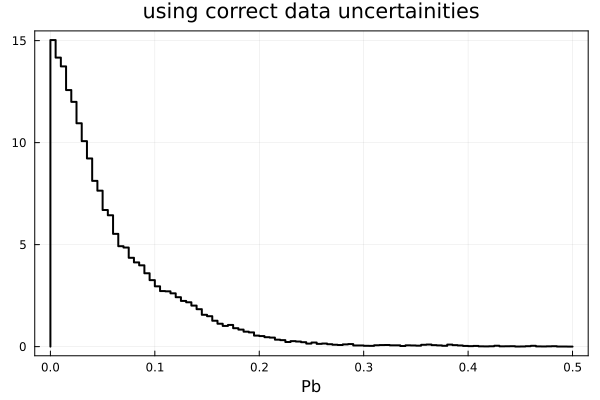

In [10]:
# Plot with marginalization over m, b, Vb, Yb for parameter Pb
histPb = stephist(accepted_Pb, nbins=200,lw=2,c=:black,legend=false,normalize=:pdf)
plot(histPb,xlabel="Pb", title = "using correct data uncertainities",framestyle=:box)


### (b) with all inlier points from 5 to 20 and data uncertainty variances σy² divided by 4 or dividing the uncertainties by 2

Acceptance ratio was = 0.37594285714285713

Best-fit, overall!
[61.30246809857412, 1.9562513575051361, 0.3249362649741631, 490.7716139687752, 7.359986883324054] 0.3966970721386581 0.39476529456421056
Best-fit, marginalized
59.0 1.95
60.0 1.96
61.0 1.97
bestm = 1.96 bestb = 60.0


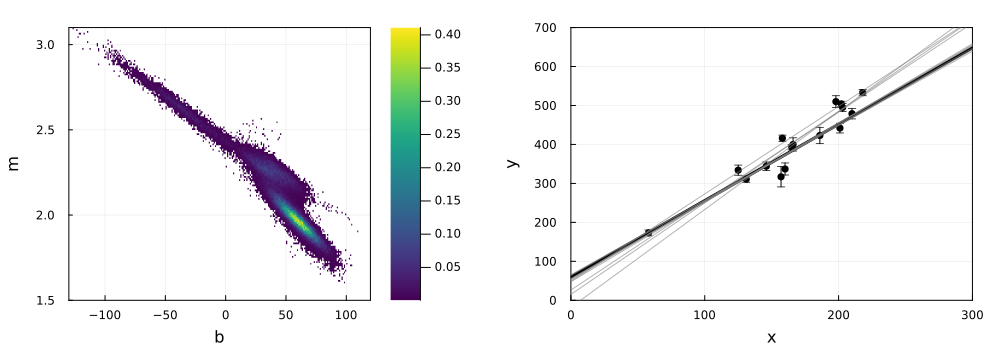

In [11]:
using CSV,DataFrames,Plots,Random,Distributions,LinearAlgebra,LaTeXStrings,SparseArrays,Statistics,Measures,StatsBase

df = CSV.read("data.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)
df1 = df[df.ID .> 4, :]

x = Array(df1.x)
y = Array(df1.y)
σx = Array(df1.sig_x)
σy = Array(df1.sig_y)
rho_xy = Array(df1.rho_xy)
n = length(x)

# Define Matrix
X = zeros(n)
Y = zeros(n) # defining a vector of n rows
A = ones(n,2) # defining matrix of n rows and 2 columns
C = zeros(n,n) # defining matrix of n rows and n columns
yerr = zeros(n)
for i in 1:n
    Y[i] = y[i]
    X[i] = x[i]
    A[i,2] = X[i]
    C[i,i] = (σy[i]^2)/4
    yerr[i] = (σy[i])/2
end

#Now compute the best fit and the uncertainties
bestfit = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y) #best fit

"""The objective function"""
function objective(pars,X,Y,yerr)
    b = pars[1]
    m = pars[2]
    Pb = pars[3]
    Yb = pars[4]
    Vb = exp(pars[5])
    if (Pb < 0 || Pb > 1)
        return -prevfloat(typemax(Float64))
    end
    return sum(log((1-Pb)/sqrt(2*pi*yerr[i]^2)*exp(-0.5*(Y[i]-m*X[i]-b)^2/yerr[i]^2)+Pb/sqrt(2*pi*(Vb+yerr[i]^2))*exp(-0.5*(Y[i]-Yb)^2/(Vb+yerr[i]^2))) for i in 1:length(X))#+pars[4]
end

#With this initial guess start off the sampling procedure
"""The metropolis_hastings MCMC function"""
function metropolis_hastings(initial_guess,X,Y,yerr,objective,nsample,nburn)
#With this initial guess start off the sampling procedure 
initialX = objective(initial_guess,X,Y,yerr)
currentX = initialX
bestX = initialX
bestfit = initial_guess
currentguess = initial_guess
naccept = 0
accepted_samples = []
push!(accepted_samples,currentguess)

parsigma=[5,0.075,0.01,1,0.1]   # proposal distribution
    for i in 1:(nburn+nsample)
        #Draw a sample from the proposal distribution
        newsample= zeros(5)
        newsample[1]= currentguess[1]+randn()*parsigma[1]
        newsample[2]= currentguess[2]+randn()*parsigma[2]
        #newsample[3]= rand()
        newsample[3]= currentguess[3]+randn()*parsigma[3]
        newsample[4]= currentguess[4]+randn()*parsigma[4]
        newsample[5]= currentguess[5]+randn()*parsigma[5]
        
        #Calculate the objective function for the newsample
        newX = objective(newsample,X,Y,yerr)
        u = rand()
        try
            #test = 0.0
            global test = exp(newX-currentX)
        catch error
            test = 2
        end
        if u < test
            #Accept
            currentX = newX
            currentguess = newsample
            naccept = naccept+1
        end
        if currentX > bestX
            bestfit = currentguess
            bestX = currentX
        end
        push!(accepted_samples,currentguess)
    end
    if ((naccept)/(nburn+nsample) < 0.5 || (naccept)/(nburn+nsample) > 0.8)
        println("Acceptance ratio was = ", (naccept)/(nburn+nsample))
        #println(naccept)
    end
    return bestfit, accepted_samples
end

#Now sample
initial_guess= ([bestfit[1],bestfit[2],0.0,mean(Y),log(var(Y))])#(m,b,Pb,Yb,Vb)
nsample = 2E5  #number of samples to take after burn-in
nburn = 10000
bestfit,accepted_samples = metropolis_hastings(initial_guess,X,Y,yerr,objective,nsample,nburn)
# accepted samples after burn in
samples=reduce(vcat,transpose.(accepted_samples))
samples=samples[setdiff(1:end, (1:nburn),(end)),:]
println()
println("Best-fit, overall!")
println(bestfit," ",mean(samples[:,3])," ",median(samples[:,3]))

#2D histogram
# Best-fit, marginalized
accepted_b = samples[:,1]
accepted_m = samples[:,2]
accepted_Pb = samples[:,3]
bins = Int(round(sqrt(nsample)/2))
histbm = fit(Histogram,(accepted_b,accepted_m),nbins=bins)

#Data with MAP line and sampling
# get the position of highest weights which is the most populated bin:
indexi=argmax(histbm.weights)[1]
indexj=argmax(histbm.weights)[2]
println("Best-fit, marginalized")
println(histbm.edges[1][indexi-1]," ",histbm.edges[2][indexj-1])
println(histbm.edges[1][indexi]," ",histbm.edges[2][indexj])
println(histbm.edges[1][indexi+1]," ",histbm.edges[2][indexj+1])
bestm = histbm.edges[2][indexj]
bestb = histbm.edges[1][indexi]
println("bestm = ",bestm," bestb = ",bestb)
histbm = histogram2d(accepted_b, accepted_m,nbins=bins, c=:viridis, xlabel="b", ylabel="m", xlims = (-130,120), ylims = (1.5,3.1),normalize=:pdf)

plot_lines = plot(xlims=(0,300),ylims=(0,700),legend=false)
plot_lines = plot!(x -> bestm*x + bestb, 0, 300,color = :black, alpha = 1,w=3,xlabel="x",ylabel="y",legend=false)
plot_lines = scatter!(X,Y,yerr=yerr,mc=:black)

#plot a sampling of 10 lines drawn from the marginalized posterior distribution for (m,b)
for i in 1:10
    ransample = Int(round(rand()*nsample))
    ransample = samples[ransample,1:2]
    mf = ransample[2]
    b  = ransample[1]
    plot_lines = plot!(x -> mf*x + b, 0, 300,color = :gray, alpha = 0.6,w=1,legend=false)
end
plot(histbm,plot_lines,size = (1000, 350),layout = (1,2), margin = 5mm,framestyle=:box)



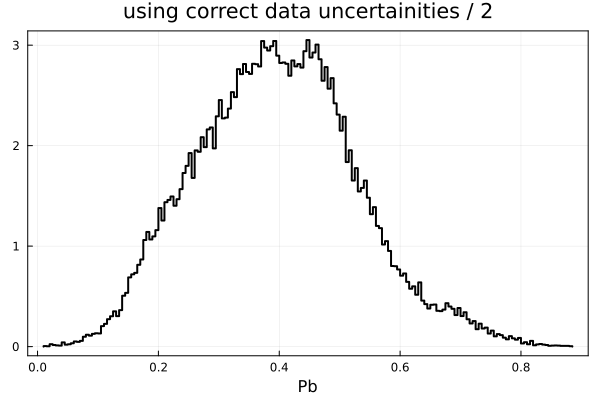

In [12]:
# Plot with marginalization over m, b, Vb, Yb for parameter Pb
histPb = stephist(accepted_Pb, nbins=200,lw=2,c=:black,legend=false,density = true,normalize=:pdf)
plot(histPb,xlabel="Pb", title = "using correct data uncertainities / 2",framestyle=:box)


## Exercise 10

### The defination of $\chi^{2}$ as given in an equation (7)
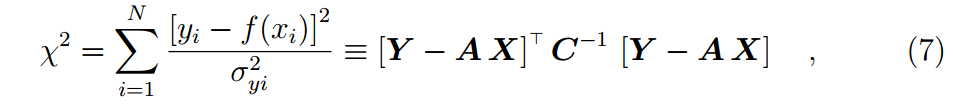


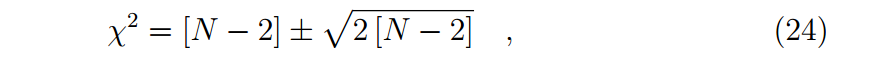

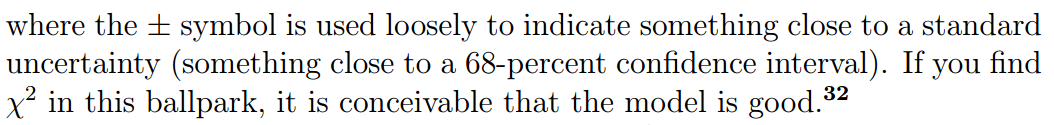

In [13]:
using CSV,DataFrames,Plots,Random,Distributions,LinearAlgebra,LaTeXStrings,SparseArrays,Statistics

df = CSV.read("data.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)
df1 = df[df.ID .> 4, :]
x = Array(df1.x)
y = Array(df1.y)
σx = Array(df1.sig_x)
σy = Array(df1.sig_y)
rho_xy = Array(df1.rho_xy)
n = length(x)

# Defining matrices
Y = zeros(n)
X = zeros(n)
A = ones(n,2)
C = zeros(n,n)
for i in 1:n
    Y[i] = y[i]
    X[i] = x[i]
    A[i,2] = x[i]
    C[i,i] = σy[i]^2
end

function get_χ²_Ex1(A,C,Y)
    bestfit = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y)
    χ² = transpose(Y-A*bestfit)*inv(C)*(Y-A*bestfit) # eqation (7)
    return χ²
end
function get_χ²_range(N)
    return [(N-2)-sqrt(2*(N-2)), (N-2)+sqrt(2*(N-2))]
end

# chi^2 value for excercise 1
println("χ²_Ex1 =",get_χ²_Ex1(A,C,Y))
# chi^2 range for excercise 1
println("χ² range__Ex1 =", get_χ²_range(size(x)[1]))

χ²_Ex1 =18.68076991124081
χ² range__Ex1 =[8.708497377870819, 19.29150262212918]


In [14]:
using CSV,DataFrames,Plots,Random,Distributions,LinearAlgebra,LaTeXStrings,SparseArrays,Statistics
df = CSV.read("data.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)
x = Array(df.x)
y = Array(df.y)
σx = Array(df.sig_x)
σy = Array(df.sig_y)
rho_xy = Array(df.rho_xy)
n = length(x)

# Defining matrices
Y = zeros(n)
X = zeros(n)
A = ones(n,2)
C = zeros(n,n)
for i in 1:n
    Y[i] = y[i]
    X[i] = x[i]
    A[i,2] = x[i]
    C[i,i] = σy[i]^2
end

function get_χ²_Ex1(A,C,Y)
    bestfit = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y)
    χ² = transpose(Y-A*bestfit)*inv(C)*(Y-A*bestfit) # eqation (7)
    return χ²
end
function get_χ²_range(N)
    return [(N-2)-sqrt(2*(N-2)), (N-2)+sqrt(2*(N-2))]
end

# chi^2 value for excercise 1
println("χ²_Ex1 =",get_χ²_Ex1(A,C,Y))
# chi^2 range for excercise 1
println("χ² range__Ex1 =", get_χ²_range(size(x)[1]))

χ²_Ex1 =289.96372278199925
χ² range__Ex1 =[12.0, 24.0]


## Exercise 11

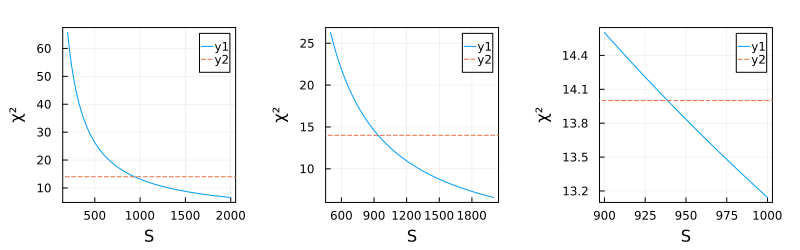

In [15]:
using CSV,DataFrames,Plots,Random,Distributions,LinearAlgebra,LaTeXStrings,SparseArrays,Statistics

df = CSV.read("data.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)
df1 = df[df.ID .> 4, :]
x = Array(df1.x)
y = Array(df1.y)
σx = Array(df1.sig_x)
σy = Array(df1.sig_y)
rho_xy = Array(df1.rho_xy)
n = length(x)

# Defining matrices
Y = zeros(n)
X = zeros(n)
A = ones(n,2)
C = zeros(n,n)
for i in 1:n
    Y[i] = y[i]
    X[i] = x[i]
    A[i,2] = x[i]
    C[i,i] = σy[i]^2
end

function get_χ²_Ex1(A,C,Y)
    bestfit = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y)
    χ² = transpose(Y-A*bestfit)*inv(C)*(Y-A*bestfit) # eqation (7)
    return χ²
end


# Finding optimal value of S for which χ² = N-2

S = []
χ² = []
χ²_avg = 14 # average of range of χ²
A = zeros(length(x),2)
    for i in 1:length(x)
        A[i,1] = 1.0
        A[i,2] = x[i]
    end
for s in 1:2000    
    C = s*Matrix(1I, size(x)[1], size(x)[1])
    bestfit = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y)
    chi_sq = transpose(Y-A* bestfit)*inv(C)*(Y-A* bestfit)
    #display(chi_sq)
    push!(S, s)
    push!(χ², chi_sq)
end

p1 = plot(S[200:length(S)], χ²[200:length(χ²)],xlabel="S",ylabel="χ²")
p1 = plot!([χ²_avg], seriestype = :hline,ls=:dash)

p2 = plot(S[500:length(S)], χ²[500:length(χ²)],xlabel="S",ylabel="χ²")
p2 = plot!([χ²_avg], seriestype = :hline,ls=:dash)

p3 = plot(S[900:1000], χ²[900:1000],xlabel="S",ylabel="χ²")
p3 = plot!([χ²_avg], seriestype = :hline,ls=:dash)
plot(p1,p2,p3, layout = (1,3),size = (800,250),framestyle=:box,margin = 5mm)

In [16]:
# value of S for which χ² = N-2
S = (14-χ²[939])*(939-938)/(χ²[939]-χ²[938])+939
println("S = ",S)

using Statistics
C = Diagonal(σy.^ 2)
println("Mean of σy² = ", mean(C))
println("Median of σy² = ", median(C))

S = 938.7335017864546
Mean of σy² = 46.19140625
Median of σy² = 0.0


## Exercise 12


Best-fit, overall!
[29.650487160796615, 2.212464557388338, 6.713593849996822] 32.48898852305588 31.523611004358187


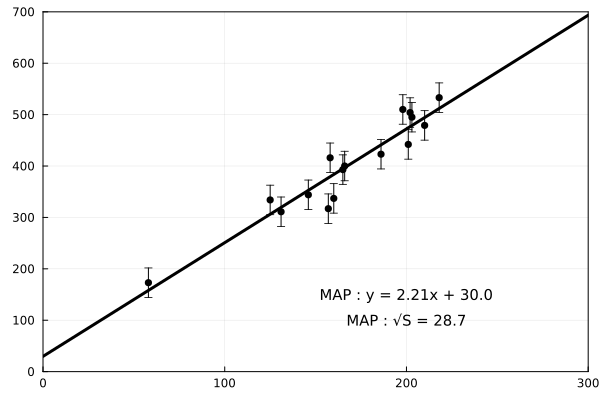

In [17]:
using CSV,DataFrames,Plots,LinearAlgebra,LaTeXStrings,SparseArrays, Statistics
df = CSV.read("data.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)
df1 = df[df.ID .> 4, :]

x = Array(df1.x)
y = Array(df1.y)
σx = Array(df1.sig_x)
σy = Array(df1.sig_y)
rho_xy = Array(df1.rho_xy)
n = length(x)

#Put the data in the appropriate arrays and matrices
X = zeros(n)
Y = zeros(n) # defining a vector of n rows
A = ones(n,2) # defining matrix of n rows and 2 columns
C = zeros(n,n) # defining matrix of n rows and n columns
for i in 1:n
    Y[i] = y[i]
    X[i] = x[i]
    A[i,2] = X[i]
    C[i,i] = σy[i]^2
end

#Now compute the best fit
bestfit = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y)

"""The objective function"""
function objective(pars,X,Y)
    b = pars[1]
    m = pars[2]
    S = exp(pars[3])
    #S = pars[3]
    return -0.5*sum(((Y[i]-m*X[i]-b)^2/S+pars[3]) for i in 1:length(X))
end

#With this initial guess start off the sampling procedure
"""The metropolis_hastings MCMC function"""
function metropolis_hastings(initialguess,X,Y,objective,nsample,nburn)

initialX = objective(initialguess,X,Y)
currentX = initialX
bestX = initialX

bestfit = initialguess
currentguess = initialguess

naccept = 0
accepted_samples = []
push!(accepted_samples,currentguess)

parsigma=[5,0.075,0.1]      #proposal distribution width (Gaussian)
    for i in 1:(nburn+nsample)
        newsample = zeros(3)
        newsample[1]= currentguess[1]+randn()*parsigma[1]
        newsample[2]= currentguess[2]+randn()*parsigma[2]
        newsample[3]= currentguess[3]+randn()*parsigma[3]

        newX = objective(newsample,X,Y)
    
        #Accept or reject
        #Reject with the appropriate probability
        u = rand()
        try
            #test = 0.0
            global test = exp(newX-currentX)
        catch error
            test = 2
        end
        if u < test
            #Accept
            currentX= newX
            currentguess= newsample
            naccept= naccept+1
        end
        if currentX > bestX
            bestfit= currentguess
            bestX= currentX
        end
        push!(accepted_samples,currentguess)
    end
    if ((naccept)/(nburn+nsample) < 0.5 || (naccept)/(nburn+nsample) > 0.8)
        println("Acceptance ratio was = ", (naccept)/(nburn+nsample))
        println(naccept)
    end
    return bestfit, accepted_samples
end

#Now sample
nsample = 2E5  #number of samples to take after burn-in
nburn = 5000   #number of burn-in samples
initialguess = [bestfit[1],bestfit[2],0.0] # [b,m,Log(S)]
bestfit,accepted_samples = metropolis_hastings(initialguess,X,Y,objective,nsample,nburn)
# accepted samples after burn in
samples=reduce(vcat,transpose.(accepted_samples))
samples=samples[setdiff(1:end, (1:nburn),(end)),:]
println()

# Data with MAP line and sampling for full posterior
accepted_b = samples[:,1]
accepted_m = samples[:,2]
accepted_S = sqrt.(exp.(samples[:,3]))

println("Best-fit, overall!")
println(bestfit," ",mean(accepted_S)," ",median(accepted_S))

bestb = bestfit[1]
bestm = bestfit[2]
bestS = sqrt(exp(bestfit[3]))

plot(x -> bestm*x + bestb, 0, 300,color = :black, alpha = 1,w=3,framestyle=:box,xlims=(0,300),ylims=(0,700),label="MAP Line")
scatter!(X,Y,yerr=bestS,legend = false,mc=:black)
plot_lines = annotate!(200, 150, text("MAP : y = $(round(bestm, sigdigits=3))x + $(round(bestb, digits=0))", 10))
plot_lines = annotate!(200, 100, text("MAP : √S = $(round(bestS,digits=1))", 10))




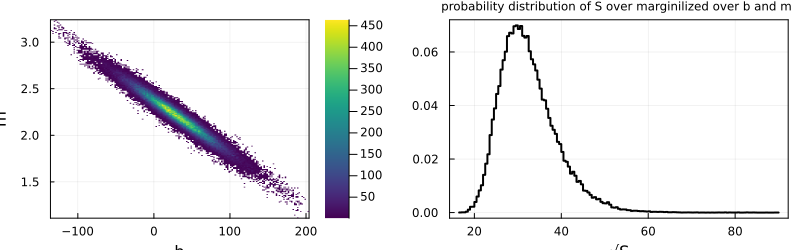

In [18]:
#Data with MAP line and sampling for the poterior after the uncertainty variance S has been marginalised
using StatsBase, LinearAlgebra
bins=Int(round(sqrt(nsample)/2))

histbm = fit(Histogram, (accepted_b,accepted_m),nbins=bins)
p1 = plot(histbm,framestyle=:box,c=:viridis, xlabel="b", ylabel="m",normalize=:pdf)
# get the position of highest weights which is the most populated bin:
index_b=argmax(histbm.weights)[1]
index_m=argmax(histbm.weights)[2]
# get the bin values in these positions:
best_b = histbm.edges[1][index_b]
best_m = histbm.edges[2][index_m]

histS = fit(Histogram,accepted_S,nbins=bins)
index_S = argmax(histS.weights)
best_S = (histS.edges[1][index_S])
histS = stephist(accepted_S, nbins=bins,lw=2,c=:black,legend=false,density = true,normalize=:pdf)

p2 = plot(histS,framestyle=:box,xlabel="√S",title = "probability distribution of S over marginilized over b and m ",titlefontsize=8)
plot(p1,p2,layout = (1,2), size=(800,250))


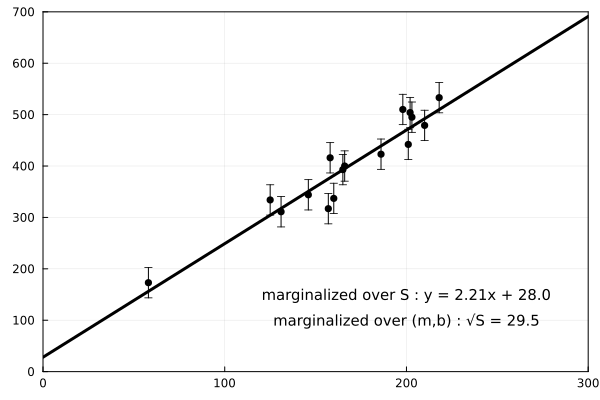

In [19]:
plot(x -> best_m*x + best_b, 0, 300,color = :black, alpha = 1,w=3,framestyle=:box,xlims=(0,300),ylims=(0,700),label="marginalized over S")
scatter!(X,Y,yerr = best_S,legend = false,mc=:black)
plot_lines = annotate!(200, 150, text("marginalized over S : y = $(round(best_m, sigdigits=3))x + $(round(best_b, digits=0))", 10))
plot_lines = annotate!(200, 100, text("marginalized over (m,b) : √S = $(round(best_S,digits=1))", 10))



## Exercise 13

Different optimizers give slightly different results...
The norm of the results differs by 9.272208975061861e-6
Since you are in non-interactive mode I will assume 'y'


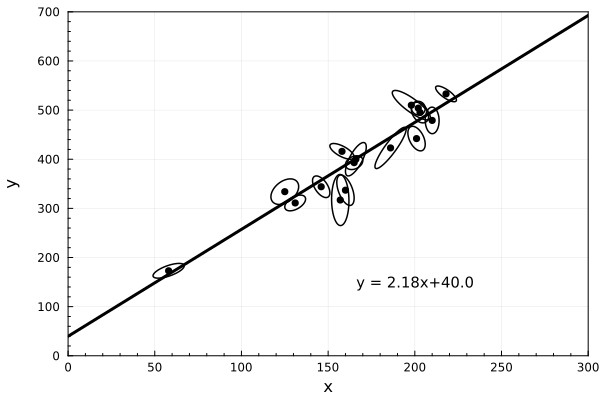

In [20]:
using CSV,DataFrames,Plots,LinearAlgebra,SciPy

df = CSV.read("data.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)
df1 = df[df.ID .> 4, :]
x = Array(df1.x)
y = Array(df1.y)
σx = Array(df1.sig_x)
σy = Array(df1.sig_y)
rho_xy = Array(df1.rho_xy)
n = length(x)

#Put the data in the appropriate arrays and matrices
X = zeros(n)
Y = zeros(n)
A = ones(n,2)
C = zeros(n,n)
Z = zeros(2,n)
ycovar = zeros(n,2,2)
for i in 1:n
    X[i] = x[i]
    Y[i] = y[i]
    Z[1,i] = X[i]
    Z[2,i] = Y[i]
    A[i,2] = X[i]
    C[i,i] = σy[i]^2
    ycovar[i,1,1]= σx[i]^2
    ycovar[i,2,1]= rho_xy[i]*sqrt(σx[i]^2*σy[i]^2)
    ycovar[i,1,2]= ycovar[i,2,1]
    ycovar[i,2,2] = σy[i]^2
end

#Now compute the best fit and the uncertainties
bestfit = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y)
mb = bestfit

function objective(mb,Z,ycovar)
    m,n = size(Z)
    v= 1.0/sqrt(1+mb[2]^2.0)*[-mb[2],1.0]
    cost = v[2]
    delta = zeros(n)
    sigma2 = zeros(n)
    for i in 1:n
        delta[i] = transpose(v)*Z[:,i]-mb[1]*cost
        sigma2[i] = transpose(v)*ycovar[i,:,:]*v
    end
    return 0.5*sum((delta[i]^2/sigma2[i])+log(sigma2[i])+log(1+mb[2]^2) for i in 1:n)
end

#Now optimize
bestfit2d1 = optimize.fmin(objective,mb,(Z,ycovar),disp=false)
#Restart the optimization once using a different method
bestfit2d = optimize.fmin_powell(objective,mb,(Z,ycovar),disp=false)

if norm(bestfit2d-bestfit2d1) > 10E-12
        if norm(bestfit2d-bestfit2d1) < 10E-6
            println("Different optimizers give slightly different results...")
        else
            println("Different optimizers give rather different results...")
        end
        println("The norm of the results differs by ", norm(bestfit2d-bestfit2d1))
        try
            text = readline("continue to plot? [yn]\n")
        catch error
            println("Since you are in non-interactive mode I will assume 'y'")
            text = 'y'
        end
        if text == 'n'
            println("returning...")
            return -1
    end
end

#Create the ellipses, the data points and best fit line
function ellipsepoints(cx, cy, rx, ry, θ)
    t = range(0, 2*pi, length=100)
    ellipse_x_r = @. rx * cos(t)
    ellipse_y_r = @. ry * sin(t)
    R = [cos(θ) sin(θ); -sin(θ) cos(θ)]
    r_ellipse = [ellipse_x_r ellipse_y_r] * R
    x_pos = @. cx + r_ellipse[:,1]
    y_pos = @. cy + r_ellipse[:,2]
    return (x_pos,y_pos)
end
ellipses = []
for i in 1:n      
        #Calculate the eigenvalues and the rotation angle
        eigs = eigen(ycovar[i,:,:])
        angle= atan(-eigs.vectors[1,2]/eigs.vectors[2,2])
        thisellipse = ellipsepoints(X[i],Y[i],sqrt(eigs.values[1]), sqrt(eigs.values[2]),angle)
        push!(ellipses,thisellipse)
        
end

m_best = bestfit2d[2]
b_best = bestfit2d[1]
plot(framestyle=:box,xlims=(0,300),ylims=(0,700),label=false,xticks=10,xminorticks=5,yticks=12,yminorticks=5)
plot_lines = plot!(x -> m_best*x + b_best, 0, 300, color = :black, alpha = 1,lw=3,xlabel="x",ylabel="y")
annotate!(200, 150, text("y = $(round(m_best, digits=2))x+$(round(b_best, digits=0))", 10,))
for i in 1:n
     plot_lines = plot!(ellipses[i],lw=1.5,color=:black,legend=false)
end
scatter!(X,Y,mc=:black)
plot(plot_lines)

## Exercise 14

### Part(A): Similar to exercise 13 but including all data point

Different optimizers give rather different results...
The norm of the results differs by 9.036105457085684e-5
Since you are in non-interactive mode I will assume 'y'


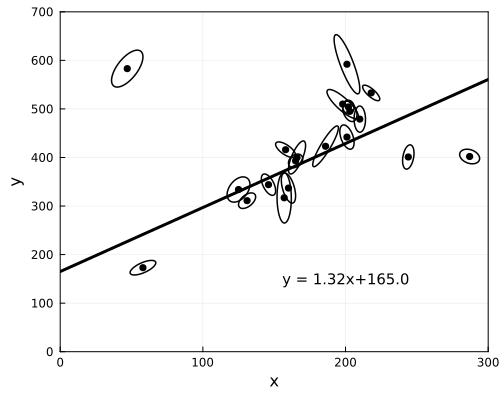

In [21]:
using CSV,DataFrames,Plots,LinearAlgebra,SciPy
df = CSV.read("data.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)
x = Array(df.x)
y = Array(df.y)
σx = Array(df.sig_x)
σy = Array(df.sig_y)
rho_xy = Array(df.rho_xy)
n = length(x)

#Put the data in the appropriate arrays and matrices
X = zeros(n)
Y = zeros(n)
A = ones(n,2)
C = zeros(n,n)
Z = zeros(2,n)
ycovar = zeros(n,2,2)
for i in 1:n
    X[i] = x[i]
    Y[i] = y[i]
    Z[1,i] = X[i]
    Z[2,i] = Y[i]
    A[i,2] = X[i]
    C[i,i] = σy[i]^2
    ycovar[i,1,1]= σx[i]^2
    ycovar[i,2,1]= rho_xy[i]*sqrt(σx[i]^2*σy[i]^2)
    ycovar[i,1,2]= ycovar[i,2,1]
    ycovar[i,2,2] = σy[i]^2
end

#Now compute the best fit and the uncertainties
bestfit = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y)
mb = bestfit

function objective(mb,Z,ycovar)
    m,n = size(Z)
    v= 1.0/sqrt(1+mb[2]^2.0)*[-mb[2],1.0]
    cost = v[2]
    delta = zeros(n)
    sigma2 = zeros(n)
    for i in 1:n
        delta[i] = transpose(v)*Z[:,i]-mb[1]*cost
        sigma2[i] = transpose(v)*hcat(ycovar[i,:,1],ycovar[i,:,2])*v
    end
    return 0.5*sum(delta[i]^2/sigma2[i]+log(sigma2[i])+log(1+mb[2]^2) for i in 1:n)
end

#Now optimize
bestfit2d1 = optimize.fmin(objective,mb,(Z,ycovar),disp=false)
#Restart the optimization once using a different method
bestfit2d = optimize.fmin_powell(objective,mb,(Z,ycovar),disp=false)
if norm(bestfit2d-bestfit2d1) > 10E-12
        if norm(bestfit2d-bestfit2d1) < 10E-6
            println("Different optimizers give slightly different results...")
        else
            println("Different optimizers give rather different results...")
        end
        println("The norm of the results differs by ", norm(bestfit2d-bestfit2d1))
        try
            text = readline("continue to plot? [yn]\n")
        catch error
            println("Since you are in non-interactive mode I will assume 'y'")
            text = 'y'
        end
        if text == 'n'
            println("returning...")
            return -1
    end
end


#Create the ellipses, the data points and best fit line
function ellipsepoints1(cx, cy, rx, ry, θ)
    t = range(0, 2*pi, length=100)
    ellipse_x_r = @. rx * cos(t)
    ellipse_y_r = @. ry * sin(t)
    R = [cos(θ) sin(θ); -sin(θ) cos(θ)]
    r_ellipse = [ellipse_x_r ellipse_y_r] * R
    x_pos = @. cx + r_ellipse[:,1]
    y_pos = @. cy + r_ellipse[:,2]
    return (x_pos,y_pos)
end
ellipses1 = []
for i in 1:n      
        #Calculate the eigenvalues and the rotation angle
        eigs = eigen(ycovar[i,:,:])
        angle= atan(-eigs.vectors[1,2]/eigs.vectors[2,2])
        thisellipse = ellipsepoints1(X[i],Y[i],sqrt(eigs.values[1]), sqrt(eigs.values[2]),angle)
        push!(ellipses1,thisellipse)
        
end

m_best = bestfit2d[2]
b_best = bestfit2d[1]
plot(framestyle=:box,xlims=(0,300),ylims=(0,700),size = (500,400),xlabel = "x",ylabel="y")
plot_lines = plot!(x -> m_best*x + b_best, 0, 300, color = :black, alpha = 1,lw=3)
scatter!(X,Y,mc=:black)
annotate!(200, 150, text("y = $(round(m_best, sigdigits=3))x+$(round(b_best, sigdigits=3))", 10,))
for i in 1:n
     plot_lines = plot!(ellipses1[i],lw=1.5,color=:black,legend=false)
end
plot(plot_lines)


### Part(B) using Matropolis-Markov MCMC

Acceptance ratio was = 0.3790731707317073

Best-fit, overall!
[17.800235012650823, 1.1370364354007316, 0.09849948627207085, 233.22553943710858, 435.95542968797207, 9.417005248152222, 8.79824498635899, -0.9940680024616244] 0.17957498187852644 0.1684119021202618
Best-fit, marginalized
13.5 1.146
14.0 1.147
14.5 1.148
b = 34.04471463513064 mf = 2.2166376847483034


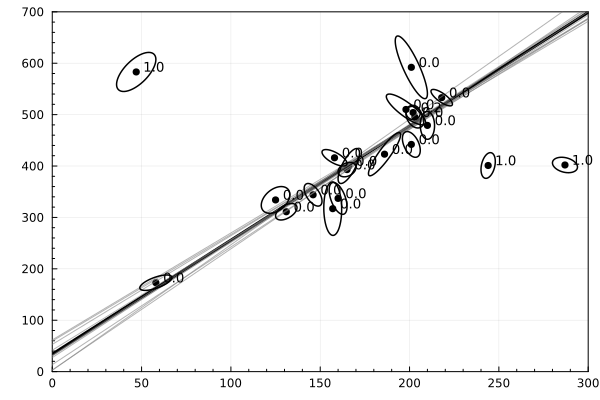

In [22]:
using CSV,DataFrames,Plots,Statistics,LinearAlgebra,Distributions,StatsBase

df = CSV.read("data.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)

x = Array(df.x)
y = Array(df.y)
σx = Array(df.sig_x)
σy = Array(df.sig_y)
rho_xy = Array(df.rho_xy)
n = length(x)

#Put the data in the appropriate arrays and matrices
X  = zeros(n)
Y = zeros(n)
A = ones(n,2)
C = zeros(n,n)
Z = zeros(2,n)
ycovar = zeros(n,2,2)
for i in 1:n
    X[i] = x[i]
    Y[i] = y[i]
    Z[1,i] = X[i]
    Z[2,i] = Y[i]
    A[i,2] = X[i]
    C[i,i] = σy[i]^2
    ycovar[i,1,1]= σx[i]^2
    ycovar[i,2,1]= rho_xy[i]*sqrt(σx[i]^2*σy[i]^2)
    ycovar[i,1,2]= ycovar[i,2,1]
    ycovar[i,2,2] = σy[i]^2
end

#Now compute the best fit
bestfit = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y)

"""The objective function"""
function objective(pars,Z,ycovar)
    m,n = size(Z)
    bcost = pars[1]
    t = pars[2]
    Pb = pars[3]
    Xb = pars[4]
    Yb = pars[5]
    Zb = ([Xb,Yb])
    Vb1 = exp(pars[6])
    Vb2 = exp(pars[7])
    corr = pars[8]
    V = ([[Vb1,sqrt(Vb1*Vb2)*corr] [sqrt(Vb1*Vb2)*corr,Vb2]])
    v = ([-sin(t),cos(t)])
    if (Pb < 0 || Pb > 1)
        return -prevfloat(typemax(Float64))
    end
    if (corr < -1.0 || corr > 1.0)
        return -prevfloat(typemax(Float64))
    end    
    delta = zeros(n)
    sigma2 = zeros(n)
    detVycovar = zeros(n)
    deltaOUT   = zeros(n)
    for i in 1:n
        delta[i] = transpose(v)*Z[:,i] - bcost
        sigma2[i] = transpose(v)*hcat(ycovar[i,:,1],ycovar[i,:,2])*v
        detVycovar[i]= sqrt(det(V+ycovar[i,:,:]))
        deltaOUT[i]= transpose(Z[:,i]-Zb)*(inv(V+ycovar[i,:,:]))*(Z[:,i]-Zb)
    end
    return sum(log(((1-Pb)/sqrt(2*pi*sigma2[i]/cos(t)^2))*exp(-0.5*(delta[i]^2)/sigma2[i])+(Pb/(2*pi*detVycovar[i]))*exp(-0.5*deltaOUT[i])) for i in 1:n)
end

"""Probability that one data point is bad"""
function Pbad(pars,Z,ycovar)
    bcost = pars[1]
    t = pars[2]
    Pb = pars[3]
    Xb = pars[4]
    Yb = pars[5]
    Zb = ([Xb,Yb])
    Vb1 = exp(pars[6])
    Vb2 = exp(pars[7])
    corr = pars[8]
    V = ([[Vb1,sqrt(Vb1*Vb2)*corr] [sqrt(Vb1*Vb2)*corr,Vb2]])
    v = ([-sin(t),cos(t)])
    delta = transpose(v)*Z - bcost
    sigma2 = transpose(v)*ycovar*v
    detVycovar = sqrt(det(V+ycovar))
    deltaOUT = transpose(Z-Zb)*(inv(V+ycovar))*(Z-Zb)
    Pbad = (Pb/(2*pi*detVycovar))*exp(-deltaOUT/2)
    return Pbad/(Pbad+(1.0-Pb)/sqrt(2*pi*sigma2)*exp(-0.5*delta^2/sigma2/cos(t)^2))
end

"""The metropolis_hastings MCMC function"""
function metropolis_hastings(initial_guess,Z,ycovar,objective,nsample,nburn)
#With this initial guess start off the sampling procedure 
initialX = objective(initial_guess,Z,ycovar)
currentX = initialX
bestX = initialX
bestfit = initial_guess
currentguess = initial_guess
naccept = 0
accepted_samples = []
push!(accepted_samples,currentguess)

parsigma=[1,pi/200.0,0.01,0.5,1.0,0.05,0.1,0.005]   # proposal distribution
#parsigma=[1,pi/200,0.01,0.5,1.0,0.05,0.1,0.005],
    for i in 1:(nburn+nsample)
        #Draw a sample from the proposal distribution
        newsample= zeros(8)
        newsample[1]= currentguess[1]+randn()*parsigma[1]
        newsample[2]= currentguess[2]+randn()*parsigma[2]
        newsample[3]= currentguess[3]+randn()*parsigma[3]
        newsample[4]= currentguess[4]+randn()*parsigma[4]
        newsample[5]= currentguess[5]+randn()*parsigma[5]
        newsample[6]= currentguess[6]+randn()*parsigma[6]
        newsample[7]= currentguess[7]+randn()*parsigma[7]
        newsample[8]= currentguess[8]+randn()*parsigma[8]
        
        #Calculate the objective function for the newsample
        newX = objective(newsample,Z,ycovar)
        u = rand()
        try
            #test = 0.0
            global test = exp(newX-currentX)
        catch error
            test = 2
        end
        if u < test
            #Accept
            currentX= newX
            currentguess= newsample
            naccept= naccept+1
        end
        if currentX > bestX
            bestfit= currentguess
            bestX= currentX
        end
        push!(accepted_samples,currentguess)
    end
    if ((naccept)/(nburn+nsample) < 0.5 || (naccept)/(nburn+nsample) > 0.8)
        println("Acceptance ratio was = ", (naccept)/(nburn+nsample))
        #println(naccept)
    end
    return bestfit, accepted_samples
end

"""Create the ellipses"""
function ellipsepoints2(cx, cy, rx, ry, θ)
    t = range(0, 2*pi, length=100)
    ellipse_x_r = @. rx * cos(t)
    ellipse_y_r = @. ry * sin(t)
    R = [cos(θ) sin(θ); -sin(θ) cos(θ)]
    r_ellipse = [ellipse_x_r ellipse_y_r] * R
    x_pos = @. cx + r_ellipse[:,1]
    y_pos = @. cy + r_ellipse[:,2]
    return (x_pos,y_pos)
end


#Now sample
init_theta = acos(1/sqrt(1 + bestfit[2]^2))
if bestfit[2] < 0
    init_theta = pi - init_theta
end
initial_guess = [cos(init_theta),init_theta,0.0,mean(X),mean(Y),log(var(X)),log(var(X)),0.0]#(m,b,Pb,Yb,Vb)
nsample = 2E5  #number of samples to take after burn-in
nburn = 5000

bestfit,accepted_samples = metropolis_hastings(initial_guess,Z,ycovar,objective,nsample,nburn)
# accepted samples after burn in
samples=reduce(vcat,transpose.(accepted_samples))
samples=samples[setdiff(1:end, (1:nburn),(end)),:]
println()
println("Best-fit, overall!")
println(bestfit," ",mean(samples[:,3])," ",median(samples[:,3]))

# Best-fit, marginalized
accepted_bcost = samples[:,1]
accepted_t = samples[:,2]
bins = Int(round(sqrt(nsample)/2))
histbm = fit(Histogram,(accepted_bcost,accepted_t),nbins=bins)
#p1 = plot(histbm,framestyle=:box,c=:viridis, xlabel="b", ylabel="m")

# get the position of highest weights which is the most populated bin:
indexi=argmax(histbm.weights)[1]
indexj=argmax(histbm.weights)[2]
println("Best-fit, marginalized")
println(histbm.edges[1][indexi-1]," ",histbm.edges[2][indexj-1])
println(histbm.edges[1][indexi]," ",histbm.edges[2][indexj])
println(histbm.edges[1][indexi+1]," ",histbm.edges[2][indexj+1])
t = histbm.edges[2][indexj]
bcost = histbm.edges[1][indexi]
mf = sqrt((1/cos(t)^2)-1)
b = bcost/cos(t)
println("b = ",b," mf = ",mf)
plot_lines = plot(framestyle=:box,xlims=(0,300),ylims=(0,700),label=false,xticks=10,xminorticks=5,yticks=12,yminorticks=5)
plot!(x -> mf*x + b, 0, 300,color = :black, alpha = 1,w=3)
scatter!(df.x,df.y,mc=:black)

#plot a sampling of 10 lines drawn from the marginalized posterior distribution for (m,b)
for i in 1:10
    ransample = Int(round(rand()*nsample))
    ransample = samples[ransample,1:2]
    mf = sqrt(1.0/cos(ransample[2])^2 - 1)
    b  = ransample[1]/cos(ransample[2])
    bestb = b
    bestm = mf
    plot_lines = plot!(x -> mf*x + b, 0, 300,color = :gray, alpha = 0.6,w=1,legend=false)
end

#Add labels
nsamples = length(samples[:,1])
for i in 1:length(X)
    Pb= 0.0
    for j in 1:nsamples
        Pb+= Pbad(samples[j,:],Z[:,i],ycovar[i,:,:])
    end
    Pb/= nsamples
    plot_lines = annotate!(Z[1,i]+10, Z[2,i]+10, text("$(round(Pb,digits=1))",9),color = :gray)
end

#Create the ellipses, the data points and best fit line
ellipses2 = []
for i in 1:n   
        #Calculate the eigenvalues and the rotation angle
        eigs = eigen(ycovar[i,:,:])
        angle= atan(-eigs.vectors[1,2]/eigs.vectors[2,2])
        thisellipse = ellipsepoints2(X[i],Y[i],sqrt(eigs.values[1]), sqrt(eigs.values[2]),angle)
        push!(ellipses2,thisellipse)
end
for i in 1:n
     plot_lines = plot!(ellipses2[i],lw=1.5,color=:black,legend=false)
end

plot(plot_lines)



## Exercise 15

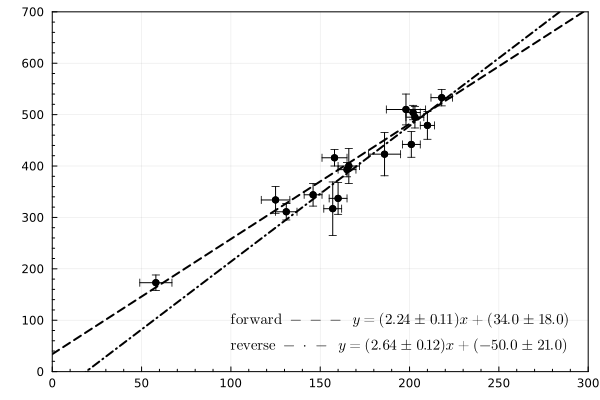

In [23]:
using CSV,DataFrames,Plots,LaTeXStrings
df = CSV.read("data.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)
df1 = df[df.ID .> 4, :]
x = Array(df1.x)
y = Array(df1.y)
σx = Array(df1.sig_x)
σy = Array(df1.sig_y)
rho_xy = Array(df1.rho_xy)
n = length(x)

#Put the dat in the appropriate arrays and matrices
Y1 = zeros(n)
X1 = zeros(n)
A1 = ones(n,2)
C1 = zeros(n,n)
Y2 = zeros(n)
X2 = zeros(n)
A2 = ones(n,2)
C2 = zeros(n,n)
yerr = zeros(n)
xerr = zeros(n)
ycovar = zeros(n,2,2)

for i in 1:n
    Y1[i] = y[i]
    X1[i] = x[i]
    A1[i,2] = x[i]
    C1[i,i] = σy[i]^2
    yerr[i] = σy[i]
    
    Y2[i] = x[i]
    X2[i] = y[i]
    A2[i,2] = y[i]
    C2[i,i] = σx[i]^2
    xerr[i] = σx[i]
end

#Now compute the best fit and the uncertainties: forward
bestfit1 = inv(transpose(A1)*inv(C1)*A1)*(transpose(A1)*inv(C1)*Y1)
b1 = round(bestfit1[1],digits=0)
m1 = round(bestfit1[2],digits=2)
#The full uncertainty covariance matrix for each data point is given by
bestfitvar1 = inv(transpose(A1)*inv(C1)*A1)
# Standard Error in Intercept
SE_b1 = round(sqrt(bestfitvar1[1,1]),digits=0)
# Standard Error in Slope
SE_m1 = round(sqrt(bestfitvar1[2,2]),digits=2)

#Now compute the best fit and the uncertainties: backward
bestfit2 = inv(transpose(A2)*inv(C2)*A2)*(transpose(A2)*inv(C2)*Y2)
bestfitvar2 = inv(transpose(A2)*inv(C2)*A2)
#Propagate to y=mx+b
linerrprop = ([[-1.0/bestfit2[2],bestfit2[1]/bestfit2[2]^2],[0.0, -1.0/bestfit2[2]^2]])
linerrprop =  reduce(vcat,transpose.(linerrprop))
bestfit2   =  ([-bestfit2[1]/bestfit2[2],1.0/bestfit2[2]])
bestfitvar2 = (linerrprop)*(bestfitvar2)*(linerrprop)'
b2 = round(bestfit2[1],digits=0)
m2 = round(bestfit2[2],digits=2)
# Standard Error in Intercept
SE_b2 = round(sqrt(bestfitvar2[1,1]),digits=0)
# Standard Error in Slope
SE_m2 = round(sqrt(bestfitvar2[2,2]),digits=2)

#Plot result
plot(framestyle=:box,xlims=(0,300),ylims=(0,700),xticks=10,xminorticks=5,yticks=12,yminorticks=5)
plot!(x -> m1*x + b1, 0, 300,color = :black, alpha = 1,w=2,line=:dash)
note=raw"\mathrm{forward}\ ---\:\ y =(\textrm{"*"$m1"*raw"} \pm \textrm{"*"$SE_m1"*raw"})x + (\textrm{"*"$b1"*raw"} \pm \textrm{"*"$SE_b1"*raw"})"
annotate!( 100,  100, text(latexstring(note),:left, 10))
scatter!(x,y,yerr=yerr,mc=:black,legend=false)

plot!(x -> m2*x + b2, 0, 300,color = :black, alpha = 1,w=2,line=:dashdot)
note=raw"\mathrm{reverse}\ -\cdot -\:\ y =(\textrm{"*"$m2"*raw"} \pm \textrm{"*"$SE_m2"*raw"})x + (\textrm{"*"$b2"*raw"} \pm \textrm{"*"$SE_b2"*raw"})"
annotate!( 100,  50, text(latexstring(note),:left, 10))
scatter!(x,y,xerr=xerr,mc=:black,legend=false)


## Exercise 16

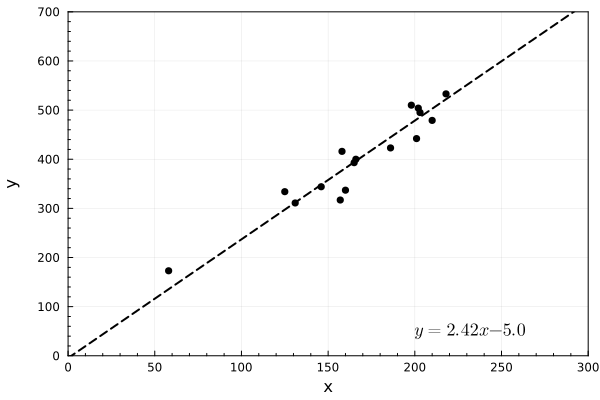

In [24]:
using CSV,DataFrames,Plots,Statistics,LinearAlgebra,LaTeXStrings
df = CSV.read("data.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)
df1 = df[df.ID .> 4, :]
x = Array(df1.x)
y = Array(df1.y)
σx = Array(df1.sig_x)
σy = Array(df1.sig_y)
rho_xy = Array(df1.rho_xy)
n = length(x)

#Put the dat in the appropriate arrays and matrices
Y = zeros(n)
X = zeros(n)
Z = zeros(n,2)
for i in 1:n
    Y[i]= y[i]
    X[i]= x[i]
    Z[i,1]= X[i]
    Z[i,2]= Y[i]
end

#Now compute the PCA solution
Zm = mean.(eachcol(Z))
Q = cov(Z)
eigs = eigen(Q)
maxindx = argmax(eigs.values)
V = eigs.vectors[maxindx,:]
V = V/norm(V)

m = sqrt(1/V[1]^2-1)
bestfit = ([-m*Zm[1]+Zm[2],m])

#Plot result
m = round(bestfit[2],digits=2)
b = round(bestfit[1],digits=0)
plot(framestyle=:box,xlims=(0,300),ylims=(0,700),label=false,xticks=10,xminorticks=5,yticks=12,yminorticks=5)
plot!(x -> bestfit[2]*x + bestfit[1], 0, 300,color = :black,w=2,legend=false,line = :dash,xlabel="x",ylabel="y")
scatter!(X,Y,mc=:black)
note=raw"y =\textrm{"*"$m"*raw"}x \textrm{"*"$b"*raw"}"
annotate!( 200,  50, text(latexstring(note),:left, 12))


## Exercise 17

Different optimizers give rather different results...
The norm of the results differs by 7.7427504124127315
Since you are in non-interactive mode I will assume 'y'
b, mf, V
171.16778803135844 1.3031887053368165 35.02323844355647


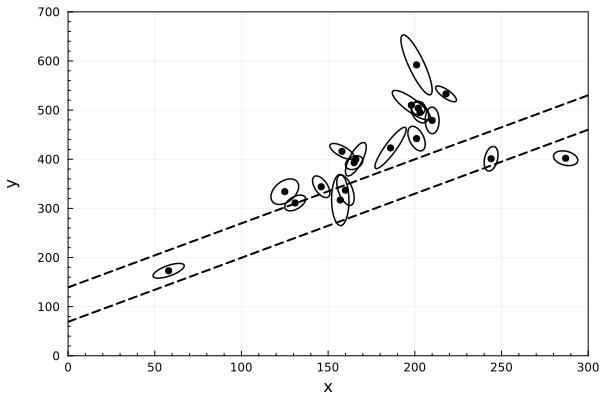

In [25]:
using CSV,DataFrames,Plots,LinearAlgebra,SciPy
df = CSV.read("data.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)
df1 = df[Not([3]), :] # excluding data point 3
x = Array(df1.x)
y = Array(df1.y)
σx = Array(df1.sig_x)
σy = Array(df1.sig_y)
rho_xy = Array(df1.rho_xy)
n = length(x)

#Put the data in the appropriate arrays and matrices
Y = zeros(n)
X = zeros(n)
A = ones(n,2)
C = zeros(n,n)
Z = zeros(2,n)
ycovar = zeros(n,2,2)
for i in 1:n
    Y[i] = y[i]
    X[i] = x[i]
    A[i,2] = X[i]
    C[i,i] = σy[i]^2
    Z[1,i] = X[i]
    Z[2,i] = Y[i]
    ycovar[i,1,1]= σx[i]^2
    ycovar[i,2,1]= rho_xy[i]*sqrt(σx[i]^2*σy[i]^2)
    ycovar[i,1,2]= ycovar[i,2,1]
    ycovar[i,2,2] = σy[i]^2
end

#Now compute the best fit and the uncertainties
bestfitvar = inv(A'*inv(C)*A)
bestfit = inv(A'*inv(C)*A)*(A'*inv(C)*Y)

"""The objective function"""
function objective(mbV,Z,ycovar)
    v = 1/sqrt(1+mbV[2]^2)*([-mbV[2],1])
    V = exp(mbV[3])
    cost= v[2]
    m,n = size(Z)
    delta = zeros(n)
    sigma2 = zeros(n)
    for i in 1:n
        delta[i] = transpose(v)*Z[:,i]-mbV[1]*cost
        sigma2[i] = transpose(v)*ycovar[i,:,:]*v + V
    end
    return 0.5*sum((delta[i]^2/sigma2[i])+log(sigma2[i])+log(1+mbV[2]^2) for i in 1:n)
end


#Now optimize
initial = Array([bestfit[1],bestfit[2],log(1000)])
bestfit2d1 = optimize.fmin(objective,initial,(Z,ycovar),disp=false)
#Restart the optimization once using a different method
bestfit2d = optimize.fmin_powell(objective,initial,(Z,ycovar),disp=false)
if norm(bestfit2d-bestfit2d1) > 10E-12
        if norm(bestfit2d-bestfit2d1) < 10E-6
            println("Different optimizers give slightly different results...")
        else
            println("Different optimizers give rather different results...")
        end
        println("The norm of the results differs by ", norm(bestfit2d-bestfit2d1))
        try
            text = readline("continue to plot? [yn]\n")
        catch error
            println("Since you are in non-interactive mode I will assume 'y'")
            text = 'y'
        end
        if text == 'n'
            println("returning...")
            return -1
    end
end
b = bestfit2d[1]
mf = bestfit2d[2]
V =  exp(bestfit2d[3]/2)
println("b, mf, V")
println(b," ",mf," ",V)
cost = 1.0/sqrt(1+mf^2)
bcost= b*cost
b*cost

#Plot result
plot_lines = plot(framestyle=:box,xlims=(0,300),ylims=(0,700),label=false,xticks=10,xminorticks=5,yticks=12,yminorticks=5)
plot!(x -> mf*x + bcost+V, 0, 300, color = :black, alpha = 1,lw=2,line=:dash,legend = false,xlabel="x",ylabel="y")
plot!(x -> mf*x + bcost-V, 0, 300, color = :black, alpha = 1,lw=2,line=:dash)
scatter!(X,Y,mc=:black)

#Create the ellipses, the data points and best fit line
function ellipsepoints(cx, cy, rx, ry, θ)
    t = range(0, 2*pi, length=100)
    ellipse_x_r = @. rx * cos(t)
    ellipse_y_r = @. ry * sin(t)
    R = [cos(θ) sin(θ); -sin(θ) cos(θ)]
    r_ellipse = [ellipse_x_r ellipse_y_r] * R
    x_pos = @. cx + r_ellipse[:,1]
    y_pos = @. cy + r_ellipse[:,2]
    return (x_pos,y_pos)
end
ellipses = []
for i in 1:n      
        #Calculate the eigenvalues and the rotation angle
        eigs = eigen(ycovar[i,:,:])
        angle= atan(-eigs.vectors[1,2]/eigs.vectors[2,2])
        thisellipse = ellipsepoints(X[i],Y[i],sqrt(eigs.values[1]), sqrt(eigs.values[2]),angle)
        push!(ellipses,thisellipse)
        
end

for i in 1:n
      plot_lines = plot!(ellipses[i],lw=1.5,color=:black,legend=false)
end
plot(plot_lines)



## Exercise 18

Best-fit, overall!
[97.74301471969186, 0.9318464282736397, 7.063636075887989] 6.9676845624637345 6.953762412209631
Best-fit, marginalized
43.5 1.054
44.0  1.055
44.5 1.056
b = 89.20828514908163 mf = 1.7636888082701216
46.2 54.6


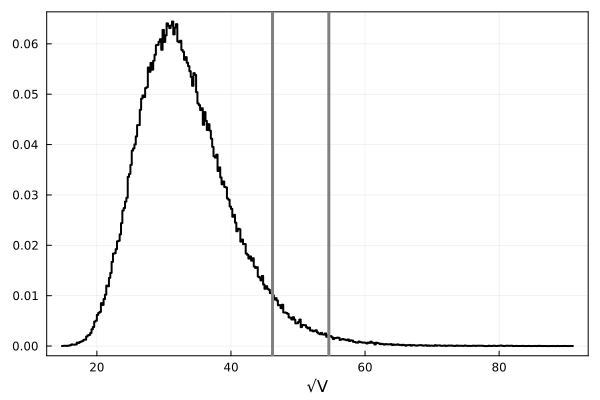

In [75]:
using CSV,DataFrames,Statistics,LinearAlgebra,Distributions,StatsBase,Plots

df = CSV.read("data.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)
df1 = df[Not([3]), :] # excluding data point 3
x = Array(df1.x)
y = Array(df1.y)
σx = Array(df1.sig_x)
σy = Array(df1.sig_y)
rho_xy = Array(df1.rho_xy)
n = length(x)

#Put the data in the appropriate arrays and matrices
Y = zeros(n)
X = zeros(n)
A = ones(n,2)
C = zeros(n,n)
Z = zeros(2,n)
ycovar = zeros(n,2,2)
for i in 1:n
    Y[i] = y[i]
    X[i] = x[i]
    A[i,2] = X[i]
    C[i,i] = σy[i]^2
    Z[1,i] = X[i]
    Z[2,i] = Y[i]
    ycovar[i,1,1]= σx[i]^2
    ycovar[i,2,1]= rho_xy[i]*sqrt(σx[i]^2*σy[i]^2)
    ycovar[i,1,2]= ycovar[i,2,1]
    ycovar[i,2,2] = σy[i]^2
end

#Now compute the best fit and the uncertainties
bestfitvar = inv(A'*inv(C)*A)
bestfit = inv(A'*inv(C)*A)*(A'*inv(C)*Y)

"""The objective function"""
function objective(pars,Z,ycovar)
    bcost = pars[1]
    t = pars[2]
    V = exp(pars[3])
    v = ([-sin(t),cos(t)])
    m,n = size(Z)
    delta = zeros(n)
    sigma2 = zeros(n)
    for i in 1:n
        delta[i] = transpose(v)*Z[:,i]-bcost
        sigma2[i] = transpose(v)*ycovar[i,:,:]*v + V      
    end
    return -0.5*sum(delta[i]^2/sigma2[i]+log(sigma2[i]/cos(t)^2) for i in 1:n)
end


"""The metropolis_hastings MCMC function"""
function metropolis_hastings(initial_guess,Z,ycovar,objective,nsample,nburn)
#With this initial guess start off the sampling procedure 
initialX = objective(initial_guess,Z,ycovar)
currentX = initialX
#print("currentX = ",currentX)
bestX = initialX
bestfit = initial_guess
currentguess = initial_guess
naccept = 0
accepted_samples = []
push!(accepted_samples,currentguess)
parsigma = [0.1,pi/200,0.1]
    
    for i in 1:(nburn+nsample)
        #Draw a sample from the proposal distribution
        newsample = zeros(3)
        newsample[1]= currentguess[1]+randn()*parsigma[1]
        newsample[2]= currentguess[2]+randn()*parsigma[2]
        newsample[3]= currentguess[3]+randn()*parsigma[3]
        
        #Calculate the objective function for the newsample
        newX = objective(newsample,Z,ycovar)
        #println(" newX = ",newX)

        u = rand()
        try
            global test = exp(newX-currentX)
        catch error
            test = 2.0
        end
        if u < test
            #Accept
            currentX = newX
            currentguess = newsample
            naccept = naccept+1
            #println("pass1")
        end
        if currentX > bestX
            bestfit = currentguess
            bestX = currentX
            #println("pass2")
        end
        #print("currentX = ",currentX)

        push!(accepted_samples,currentguess)
    end
    if ((naccept)/(nburn+nsample) < 0.5 || (naccept)/(nburn+nsample) > 0.8)
        println("Acceptance ratio was = ", (naccept)/(nburn+nsample))
        #println(naccept)
    end
    return bestfit, accepted_samples
end

#Now sample
init_theta = acos(1.0/sqrt(1.0+bestfit[2]^2))
if bestfit[2] < 0.0
    init_theta= pi - init_theta
end

initial_guess = ([bestfit[1]*cos(init_theta),init_theta,log(100.0)])#(θ,b,logV)
nsample = 5E5  #number of samples to take after burn-in
nburn = 50000

bestfit,accepted_samples = metropolis_hastings(initial_guess,Z,ycovar,objective,nsample,nburn)

# accepted samples after burn in
samples = reduce(vcat,transpose.(accepted_samples))
samples = samples[setdiff(1:end, (1:nburn),(end)),:]

println("Best-fit, overall!")
println(bestfit," ",mean(samples[:,3])," ",median(samples[:,3]))

# Best-fit, marginalized
accepted_bcost = samples[:,1]
accepted_t = samples[:,2]
accepted_V = exp.(samples[:,3]/2)
binsn = Int(round(sqrt(nsample)/2))
histbm = fit(Histogram,(accepted_bcost,accepted_t),nbins=binsn)
# get the position of highest weights which is the most populated bin:
indexi=argmax(histbm.weights)[1]
indexj=argmax(histbm.weights)[2]
println("Best-fit, marginalized")
println(histbm.edges[1][indexi-1]," ",histbm.edges[2][indexj-1])
println(histbm.edges[1][indexi],"  ",histbm.edges[2][indexj])
println(histbm.edges[1][indexi+1]," ",histbm.edges[2][indexj+1])
t = histbm.edges[2][indexj]
bcost = histbm.edges[1][indexi]
mf = sqrt((1/cos(t)^2)-1)
b = bcost/cos(t)
println("b = ",b," mf = ",mf)

#1D Histogram
histV = fit(Histogram,accepted_V,nbins=binsn)
bins = histV.edges[1][:,:]
cumhist = cumsum(histV.weights)/(sum(histV.weights)*(bins[2]-bins[1]))
ninefive = 0.0
ninenine = 0.0
foundfive = false
foundnine = false
for i in 1:length(cumhist)
    if (cumhist[i]*(bins[2]-bins[1])) > 0.95 && !foundfive
        ninefive = bins[i]
        foundfive = true
    end
    if (cumhist[i]*(bins[2]-bins[1])) > 0.99 && !foundnine
        ninenine= bins[i]
        foundnine= true
    end
end
println(ninefive," ",ninenine)
histV = stephist(accepted_V, nbins=binsn,lw=2,c=:black,legend=false,normalize=:pdf)
plot(histV,xlabel="√V",framestyle=:box)
plot!([ninefive,ninenine], seriestype = :vline,color=:gray,lw=3)
